 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8890/notebooks/MOHID/Look%20At%20Output%20File.ipynb#Open-File,-Set-Region" data-toc-modified-id="Open-File,-Set-Region-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Open File, Set Region</a></span></li><li><span><a href="http://localhost:8890/notebooks/MOHID/Look%20At%20Output%20File.ipynb#Oil-3D-at-Last-Time" data-toc-modified-id="Oil-3D-at-Last-Time-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Oil 3D at Last Time</a></span></li><li><span><a href="http://localhost:8890/notebooks/MOHID/Look%20At%20Output%20File.ipynb#3D-Oil-through-Time" data-toc-modified-id="3D-Oil-through-Time-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3D Oil through Time</a></span></li><li><span><a href="http://localhost:8890/notebooks/MOHID/Look%20At%20Output%20File.ipynb#Arrival-Time" data-toc-modified-id="Arrival-Time-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Arrival Time</a></span></li><li><span><a href="http://localhost:8890/notebooks/MOHID/Look%20At%20Output%20File.ipynb#Beaching-Time" data-toc-modified-id="Beaching-Time-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Beaching Time</a></span></li></ul></div>

# Open File, Set Region

In [111]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import xarray as xr
%matplotlib inline

In [112]:
ds = xr.open_dataset('Lagrangian_7_st_georgia_nested.nc')
ds

<xarray.Dataset>
Dimensions:              (grid_x: 396, grid_y: 896, grid_z: 40, time: 167)
Coordinates:
  * time                 (time) datetime64[ns] 2015-04-08T00:30:00 ...
  * grid_y               (grid_y) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
  * grid_x               (grid_x) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
  * grid_z               (grid_z) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
Data variables:
    OilConcentration_2D  (time, grid_y, grid_x) float64 ...
    Thickness_2D         (time, grid_y, grid_x) float64 ...
    Dissolution_3D       (time, grid_z, grid_y, grid_x) float64 ...
    OilConcentration_3D  (time, grid_z, grid_y, grid_x) float64 ...
    Beaching_Time        (grid_y, grid_x) datetime64[ns] ...
    Oil_Arrival_Time     (grid_y, grid_x) datetime64[ns] ...
Attributes:
    nco_openmp_thread_number:   1
    history:                    Mon Nov 26 18:58:12 2018: ncks -4 -L4 -A /tmp...
    NCO:                        4.7.2
    history_of_appended_file

In [113]:
imin, imax = 430, 500
jmin, jmax = 280, 350
ztop = 39 # this is backward to NEMO

# Oil 3D at Last Time

In [114]:
last_oil = ds.OilConcentration_3D[-1, ztop, imin:imax, jmin:jmax]
log_oil = np.log10(last_oil.values)
m = np.isinf(log_oil)
ma_log_oil = np.ma.masked_array(log_oil, mask=m)

/Users/sallen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


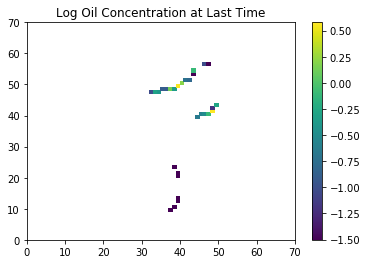

In [115]:
plt.pcolormesh(ma_log_oil)
plt.title('Log Oil Concentration at Last Time')
plt.colorbar();

Its all on the beach!

# 3D Oil through Time

In [142]:
iin, iix = imin+20, imax-10
jjn, jjx = jmin+20, jmax-10

In [148]:
myoils = ds.OilConcentration_3D[48:60, ztop, iin:iix, jjn:jjx]   # Grab some times
log_myoil = np.log10(myoils.values)
m = np.isinf(log_myoil)
ma_log_myoil = np.ma.masked_array(log_myoil, mask=m)
myoils.shape

/Users/sallen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


(12, 40, 40)

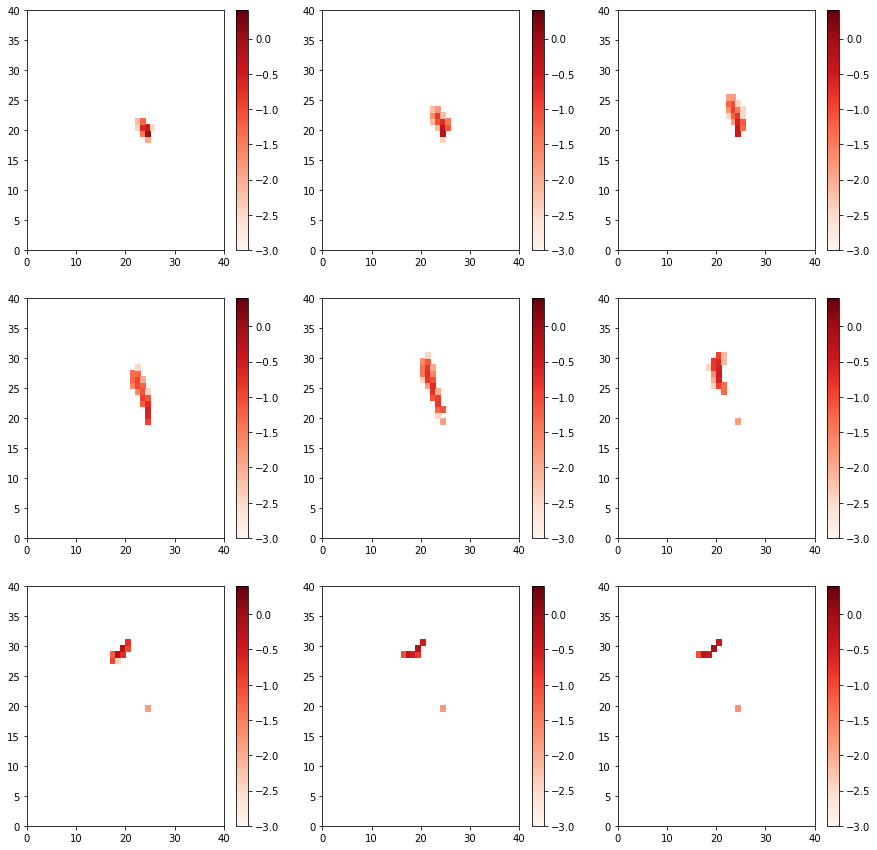

In [149]:
fig, axs = plt.subplots(3, 3, figsize=(15,15))
icount = 0
for i in range(3):
    for j in range(3):
        color=axs[i, j].pcolormesh(ma_log_myoil[icount], vmax=0.4, vmin=-3, cmap='Reds')
        fig.colorbar(color, ax=axs[i,j])
        icount += 1

Pretty weirdly discontinuous.....  Maybe our minimums set too high? No.  
Based on individual particles, so it is possible to split the cloud during strong flows.

# Arrival Time

In [88]:
arrival = ds.Oil_Arrival_Time[imin:imax, jmin:jmax]

In [89]:
ts = (arrival.values - np.datetime64('2015-04-08T00:00:00Z')) / np.timedelta64(24, 'h')

/Users/sallen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  if __name__ == '__main__':


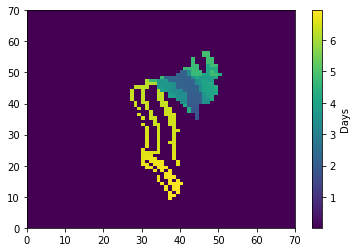

In [109]:
plt.pcolormesh(ts)
plt.colorbar(label='Days')

Okay, that makes sense.  Nice streaks heading south!

# Beaching Time

In [91]:
beach = ds.Beaching_Time[imin:imax, jmin:jmax]
tsb = (beach.values - np.datetime64('2015-04-08T00:00:00Z')) / np.timedelta64(24, 'h')

/Users/sallen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  from ipykernel import kernelapp as app


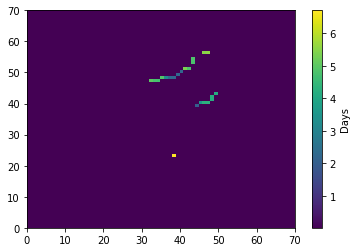

In [110]:
plt.pcolormesh(tsb)
plt.colorbar(label='Days');